<a href="https://colab.research.google.com/github/Suhail-Ahm/Predict-the-percentage/blob/main/Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload = files.upload()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
df = pd.read_csv("student_scores - student_scores.csv")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


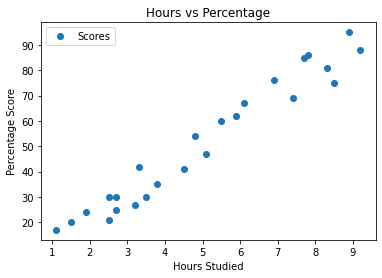

In [ ]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

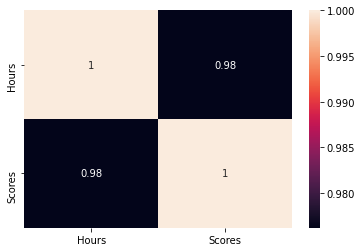

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
X = df["Hours"].values.reshape(-1,1)
y = df["Scores"].values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression().fit(X_train, y_train) 

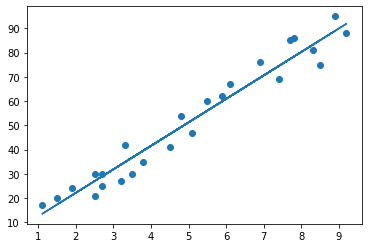

In [ ]:
# Plotting the regression line
line = regr.coef_*X+regr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## VISUALIZATION FROM SEABORN

---



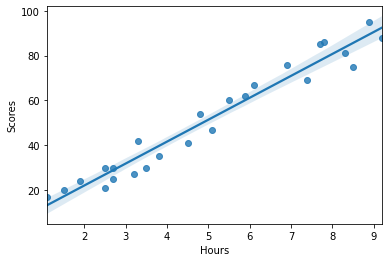

In [ ]:
sns.regplot(x="Hours", y="Scores", data=df);

## PREDICTIONS

---



In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
print("ACTUAL" ,"PREDICTED")
for i in range(len(y_test)):
  print(y_test[i] ,y_pred[i])

Actual Predicted
[81] [83.18814104]
[30] [27.03208774]
[21] [27.03208774]
[76] [69.63323162]
[62] [59.95115347]


## What will be predicted score if a student studies for 9.25 hrs/ day?

In [ ]:
hrs = np.array(9.25)
p = regr.predict(hrs.reshape(-1,1))
print("Predicted score if a student studies for 9.25 hrs/day is","%.2f" % p[0][0])

Predicted score if a student studies for 9.25 hrs/day is 92.39


## EVALUATING THE MODEL

---



In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.9207511902099244
